In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

<span style="font-family: Arial; font-weight:bold;font-size:3em;color:#00b3e5;"> Part 1

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  1. Import data:

In [2]:
data_signal = pd.read_csv('Part_1_Signal.csv')

In [3]:
print(data_signal.size)
print(data_signal.shape)

19188
(1599, 12)


In [4]:
data_signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data_signal.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

In [6]:
data_signal.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
data_signal.nunique()

Parameter 1         96
Parameter 2        143
Parameter 3         80
Parameter 4         91
Parameter 5        153
Parameter 6         60
Parameter 7        144
Parameter 8        436
Parameter 9         89
Parameter 10        96
Parameter 11        65
Signal_Strength      6
dtype: int64

In [8]:
data_signal.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [9]:
data_signal.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  2. Data analysis and visualization:

In [10]:
data_signal.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Univariate analysis

Text(0.5, 1.0, 'Parameter 2')

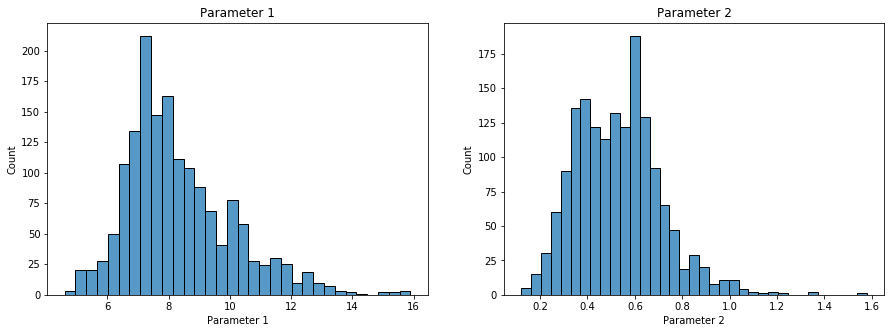

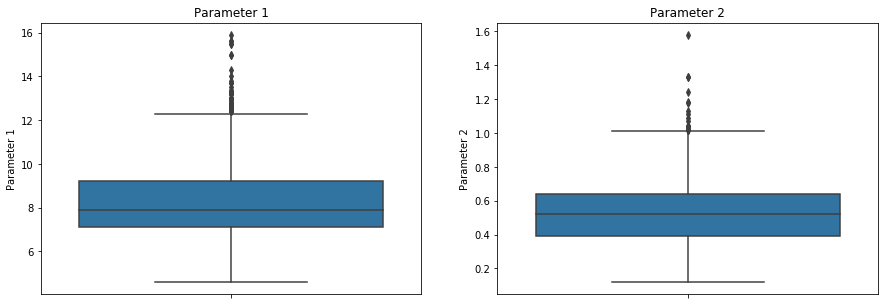

In [11]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data_signal['Parameter 1'], ax = ax[0])
sns.histplot(data_signal['Parameter 2'], ax = ax[1])

ax[0].set_title('Parameter 1')
ax[1].set_title('Parameter 2')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "Parameter 1",data=data_signal, ax = ax[0])
sns.boxplot(y = "Parameter 2",data=data_signal, ax = ax[1])

ax[0].set_title('Parameter 1')
ax[1].set_title('Parameter 2')

Text(0.5, 1.0, 'Parameter 4')

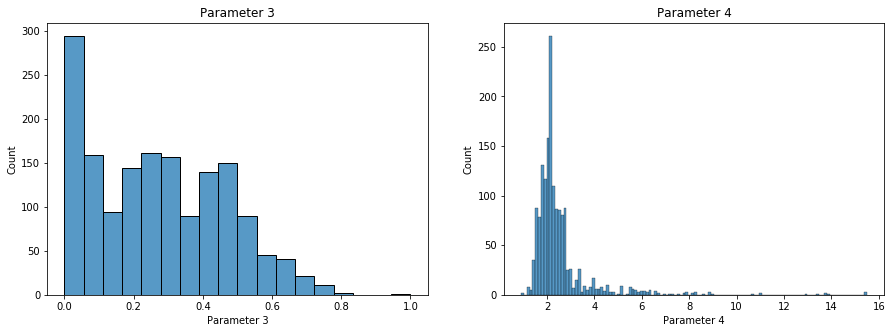

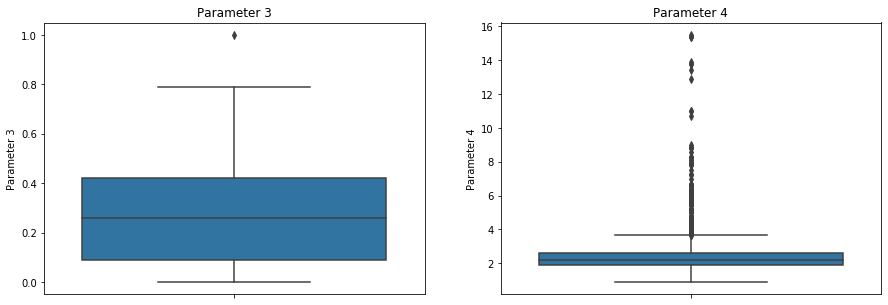

In [12]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data_signal['Parameter 3'], ax = ax[0])
sns.histplot(data_signal['Parameter 4'], ax = ax[1])

ax[0].set_title('Parameter 3')
ax[1].set_title('Parameter 4')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "Parameter 3",data=data_signal, ax = ax[0])
sns.boxplot(y = "Parameter 4",data=data_signal, ax = ax[1])

ax[0].set_title('Parameter 3')
ax[1].set_title('Parameter 4')

Text(0.5, 1.0, 'Parameter 6')

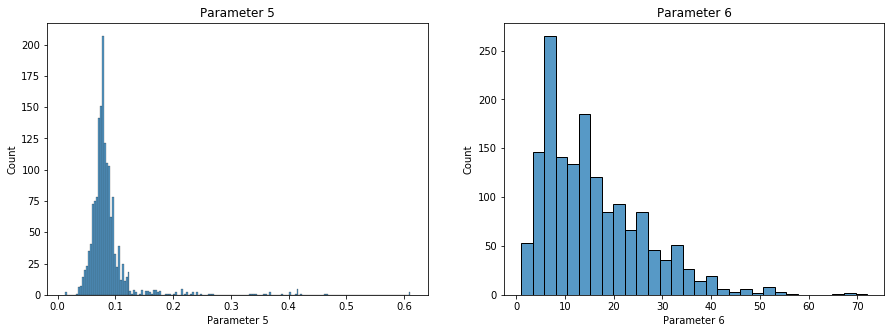

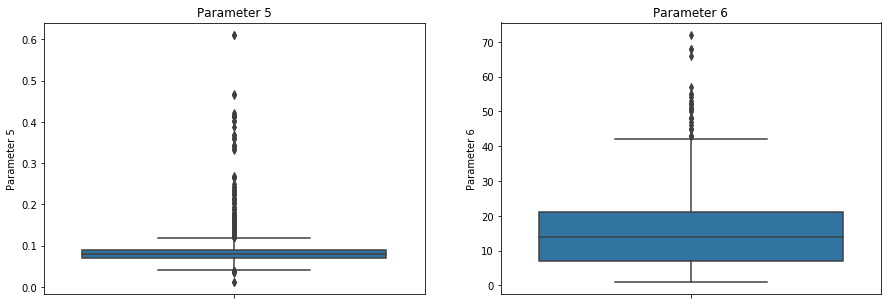

In [13]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data_signal['Parameter 5'], ax = ax[0])
sns.histplot(data_signal['Parameter 6'], ax = ax[1])

ax[0].set_title('Parameter 5')
ax[1].set_title('Parameter 6')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "Parameter 5",data=data_signal, ax = ax[0])
sns.boxplot(y = "Parameter 6",data=data_signal, ax = ax[1])

ax[0].set_title('Parameter 5')
ax[1].set_title('Parameter 6')

Text(0.5, 1.0, 'Parameter 8')

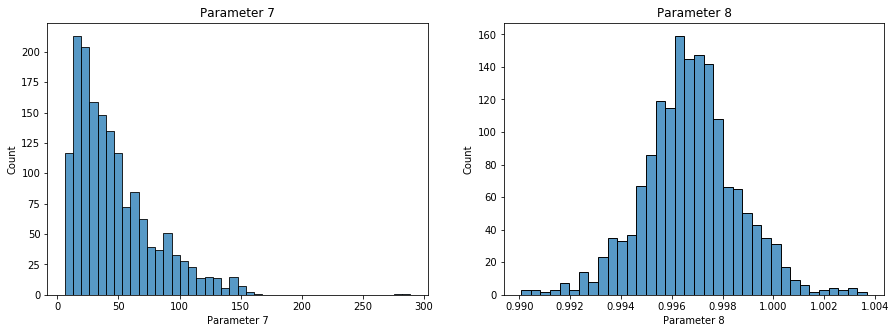

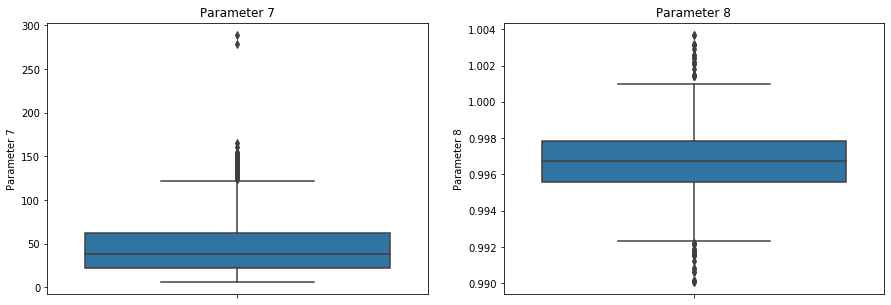

In [14]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data_signal['Parameter 7'], ax = ax[0])
sns.histplot(data_signal['Parameter 8'], ax = ax[1])

ax[0].set_title('Parameter 7')
ax[1].set_title('Parameter 8')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "Parameter 7",data=data_signal, ax = ax[0])
sns.boxplot(y = "Parameter 8",data=data_signal, ax = ax[1])

ax[0].set_title('Parameter 7')
ax[1].set_title('Parameter 8')

Text(0.5, 1.0, 'Parameter 10')

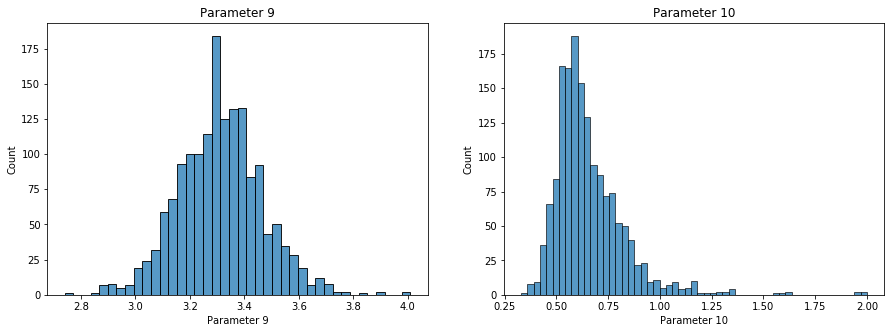

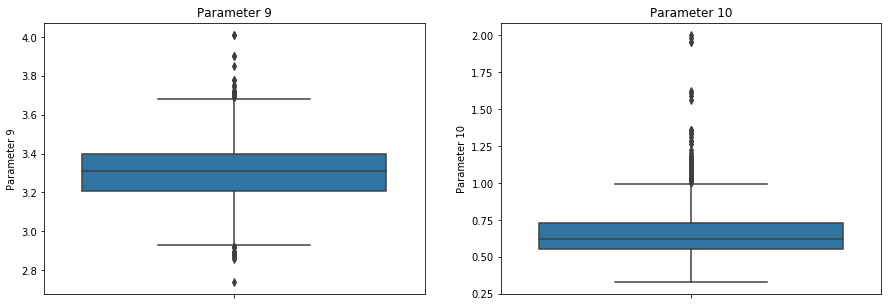

In [15]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data_signal['Parameter 9'], ax = ax[0])
sns.histplot(data_signal['Parameter 10'], ax = ax[1])

ax[0].set_title('Parameter 9')
ax[1].set_title('Parameter 10')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "Parameter 9",data=data_signal, ax = ax[0])
sns.boxplot(y = "Parameter 10",data=data_signal, ax = ax[1])

ax[0].set_title('Parameter 9')
ax[1].set_title('Parameter 10')

Text(0.5, 1.0, 'Parameter 11')

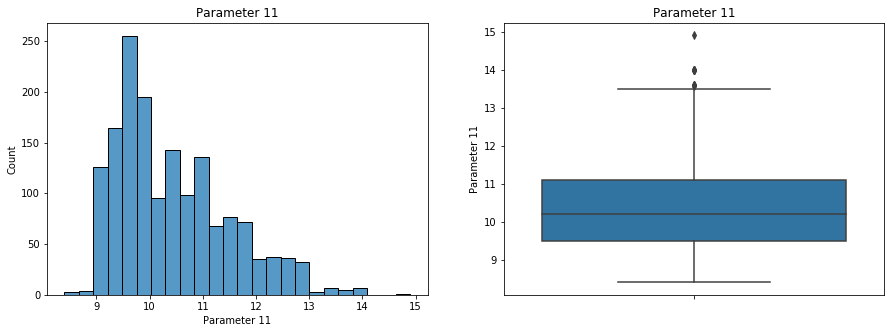

In [16]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data_signal['Parameter 11'], ax = ax[0])
sns.boxplot(y = "Parameter 11",data=data_signal, ax = ax[1])

ax[0].set_title('Parameter 11')
ax[1].set_title('Parameter 11')

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Bivariate analysis

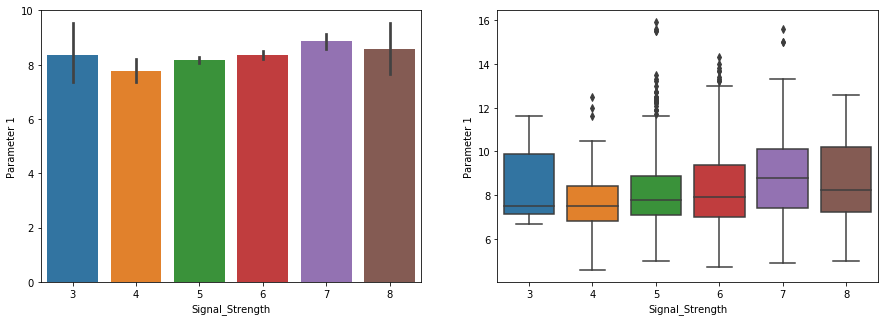

In [17]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.barplot(x="Signal_Strength",y = "Parameter 1",data=data_signal, ax = ax[0])
sns.boxplot(x="Signal_Strength",y = "Parameter 1",data=data_signal, ax = ax[1])

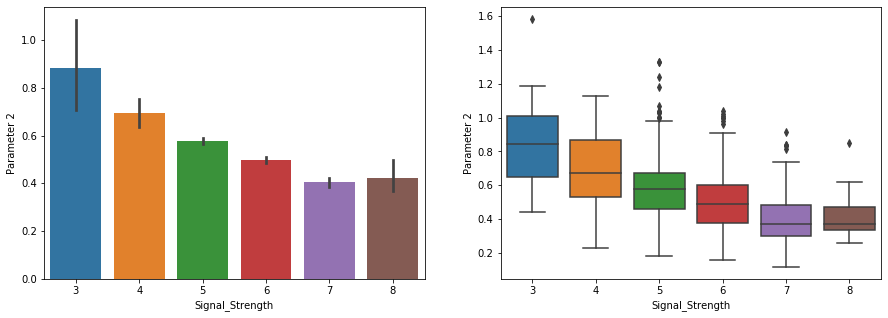

In [18]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.barplot(x="Signal_Strength",y = "Parameter 2",data=data_signal, ax = ax[0])
sns.boxplot(x="Signal_Strength",y = "Parameter 2",data=data_signal, ax = ax[1])

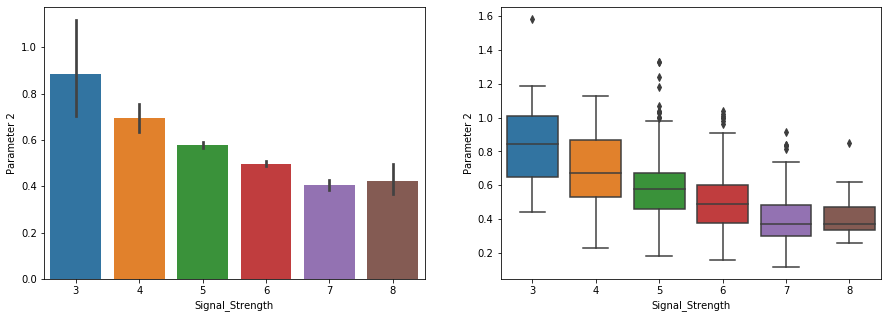

In [19]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.barplot(x="Signal_Strength",y = "Parameter 2",data=data_signal, ax = ax[0])
sns.boxplot(x="Signal_Strength",y = "Parameter 2",data=data_signal, ax = ax[1])

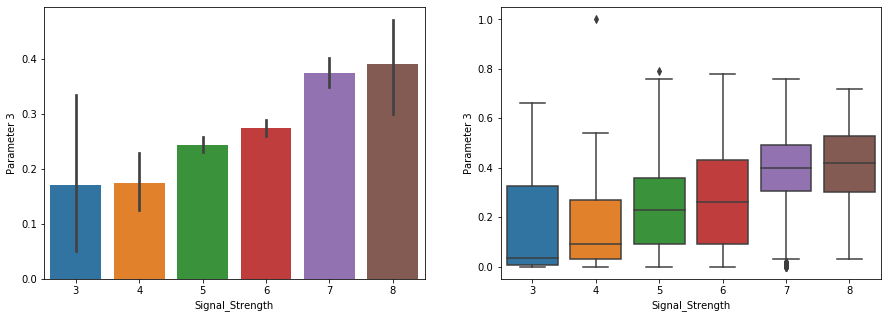

In [20]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.barplot(x="Signal_Strength",y = "Parameter 3",data=data_signal, ax = ax[0])
sns.boxplot(x="Signal_Strength",y = "Parameter 3",data=data_signal, ax = ax[1])

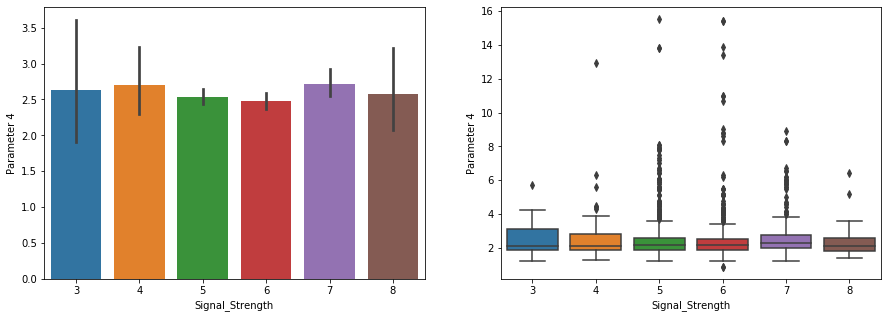

In [21]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.barplot(x="Signal_Strength",y = "Parameter 4",data=data_signal, ax = ax[0])
sns.boxplot(x="Signal_Strength",y = "Parameter 4",data=data_signal, ax = ax[1])

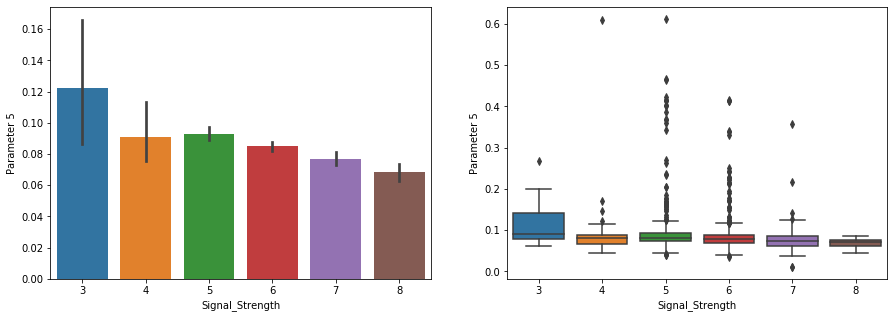

In [22]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.barplot(x="Signal_Strength",y = "Parameter 5",data=data_signal, ax = ax[0])
sns.boxplot(x="Signal_Strength",y = "Parameter 5",data=data_signal, ax = ax[1])

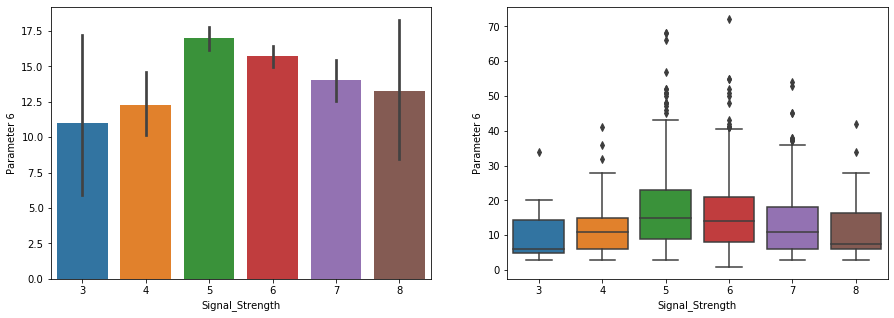

In [23]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.barplot(x="Signal_Strength",y = "Parameter 6",data=data_signal, ax = ax[0])
sns.boxplot(x="Signal_Strength",y = "Parameter 6",data=data_signal, ax = ax[1])

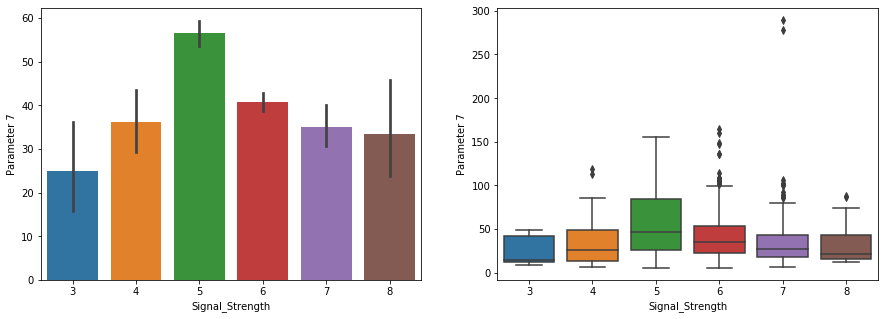

In [24]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.barplot(x="Signal_Strength",y = "Parameter 7",data=data_signal, ax = ax[0])
sns.boxplot(x="Signal_Strength",y = "Parameter 7",data=data_signal, ax = ax[1])

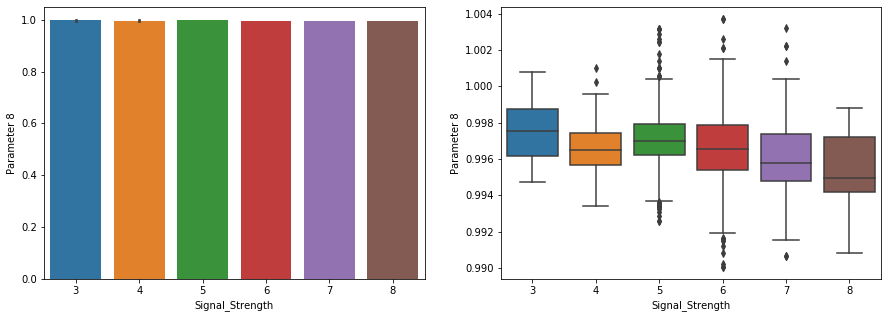

In [25]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.barplot(x="Signal_Strength",y = "Parameter 8",data=data_signal, ax = ax[0])
sns.boxplot(x="Signal_Strength",y = "Parameter 8",data=data_signal, ax = ax[1])

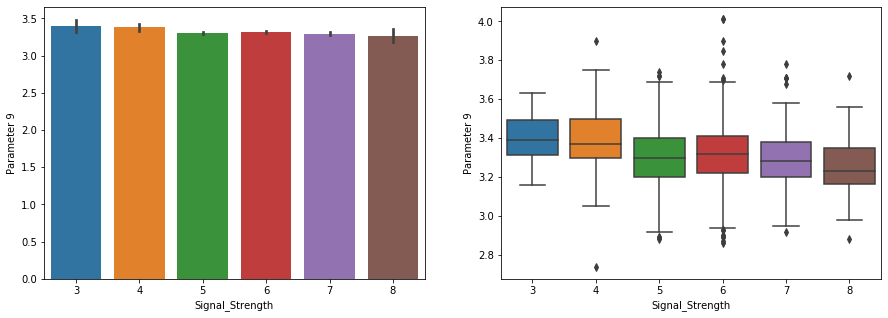

In [26]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.barplot(x="Signal_Strength",y = "Parameter 9",data=data_signal, ax = ax[0])
sns.boxplot(x="Signal_Strength",y = "Parameter 9",data=data_signal, ax = ax[1])

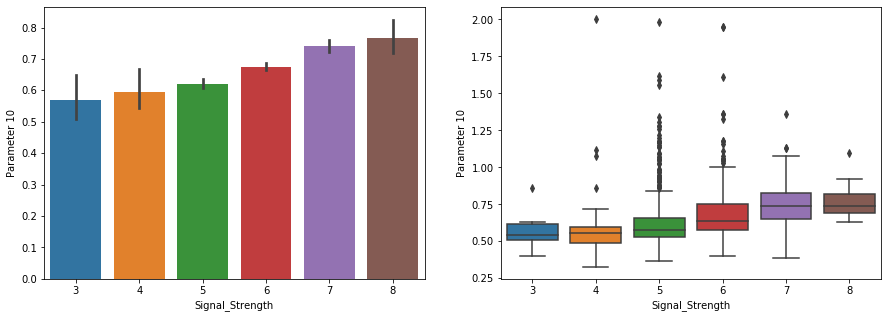

In [27]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.barplot(x="Signal_Strength",y = "Parameter 10",data=data_signal, ax = ax[0])
sns.boxplot(x="Signal_Strength",y = "Parameter 10",data=data_signal, ax = ax[1])

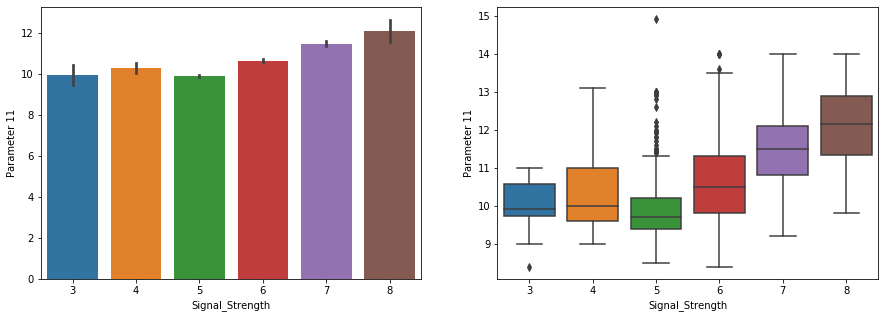

In [28]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.barplot(x="Signal_Strength",y = "Parameter 11",data=data_signal, ax = ax[0])
sns.boxplot(x="Signal_Strength",y = "Parameter 11",data=data_signal, ax = ax[1])

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Multivariate analysis

In [29]:
data_signal.corr().style.background_gradient(cmap='BuGn')

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
Parameter 2,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
Parameter 3,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
Parameter 4,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Parameter 5,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
Parameter 6,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
Parameter 7,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
Parameter 8,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
Parameter 9,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
Parameter 10,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


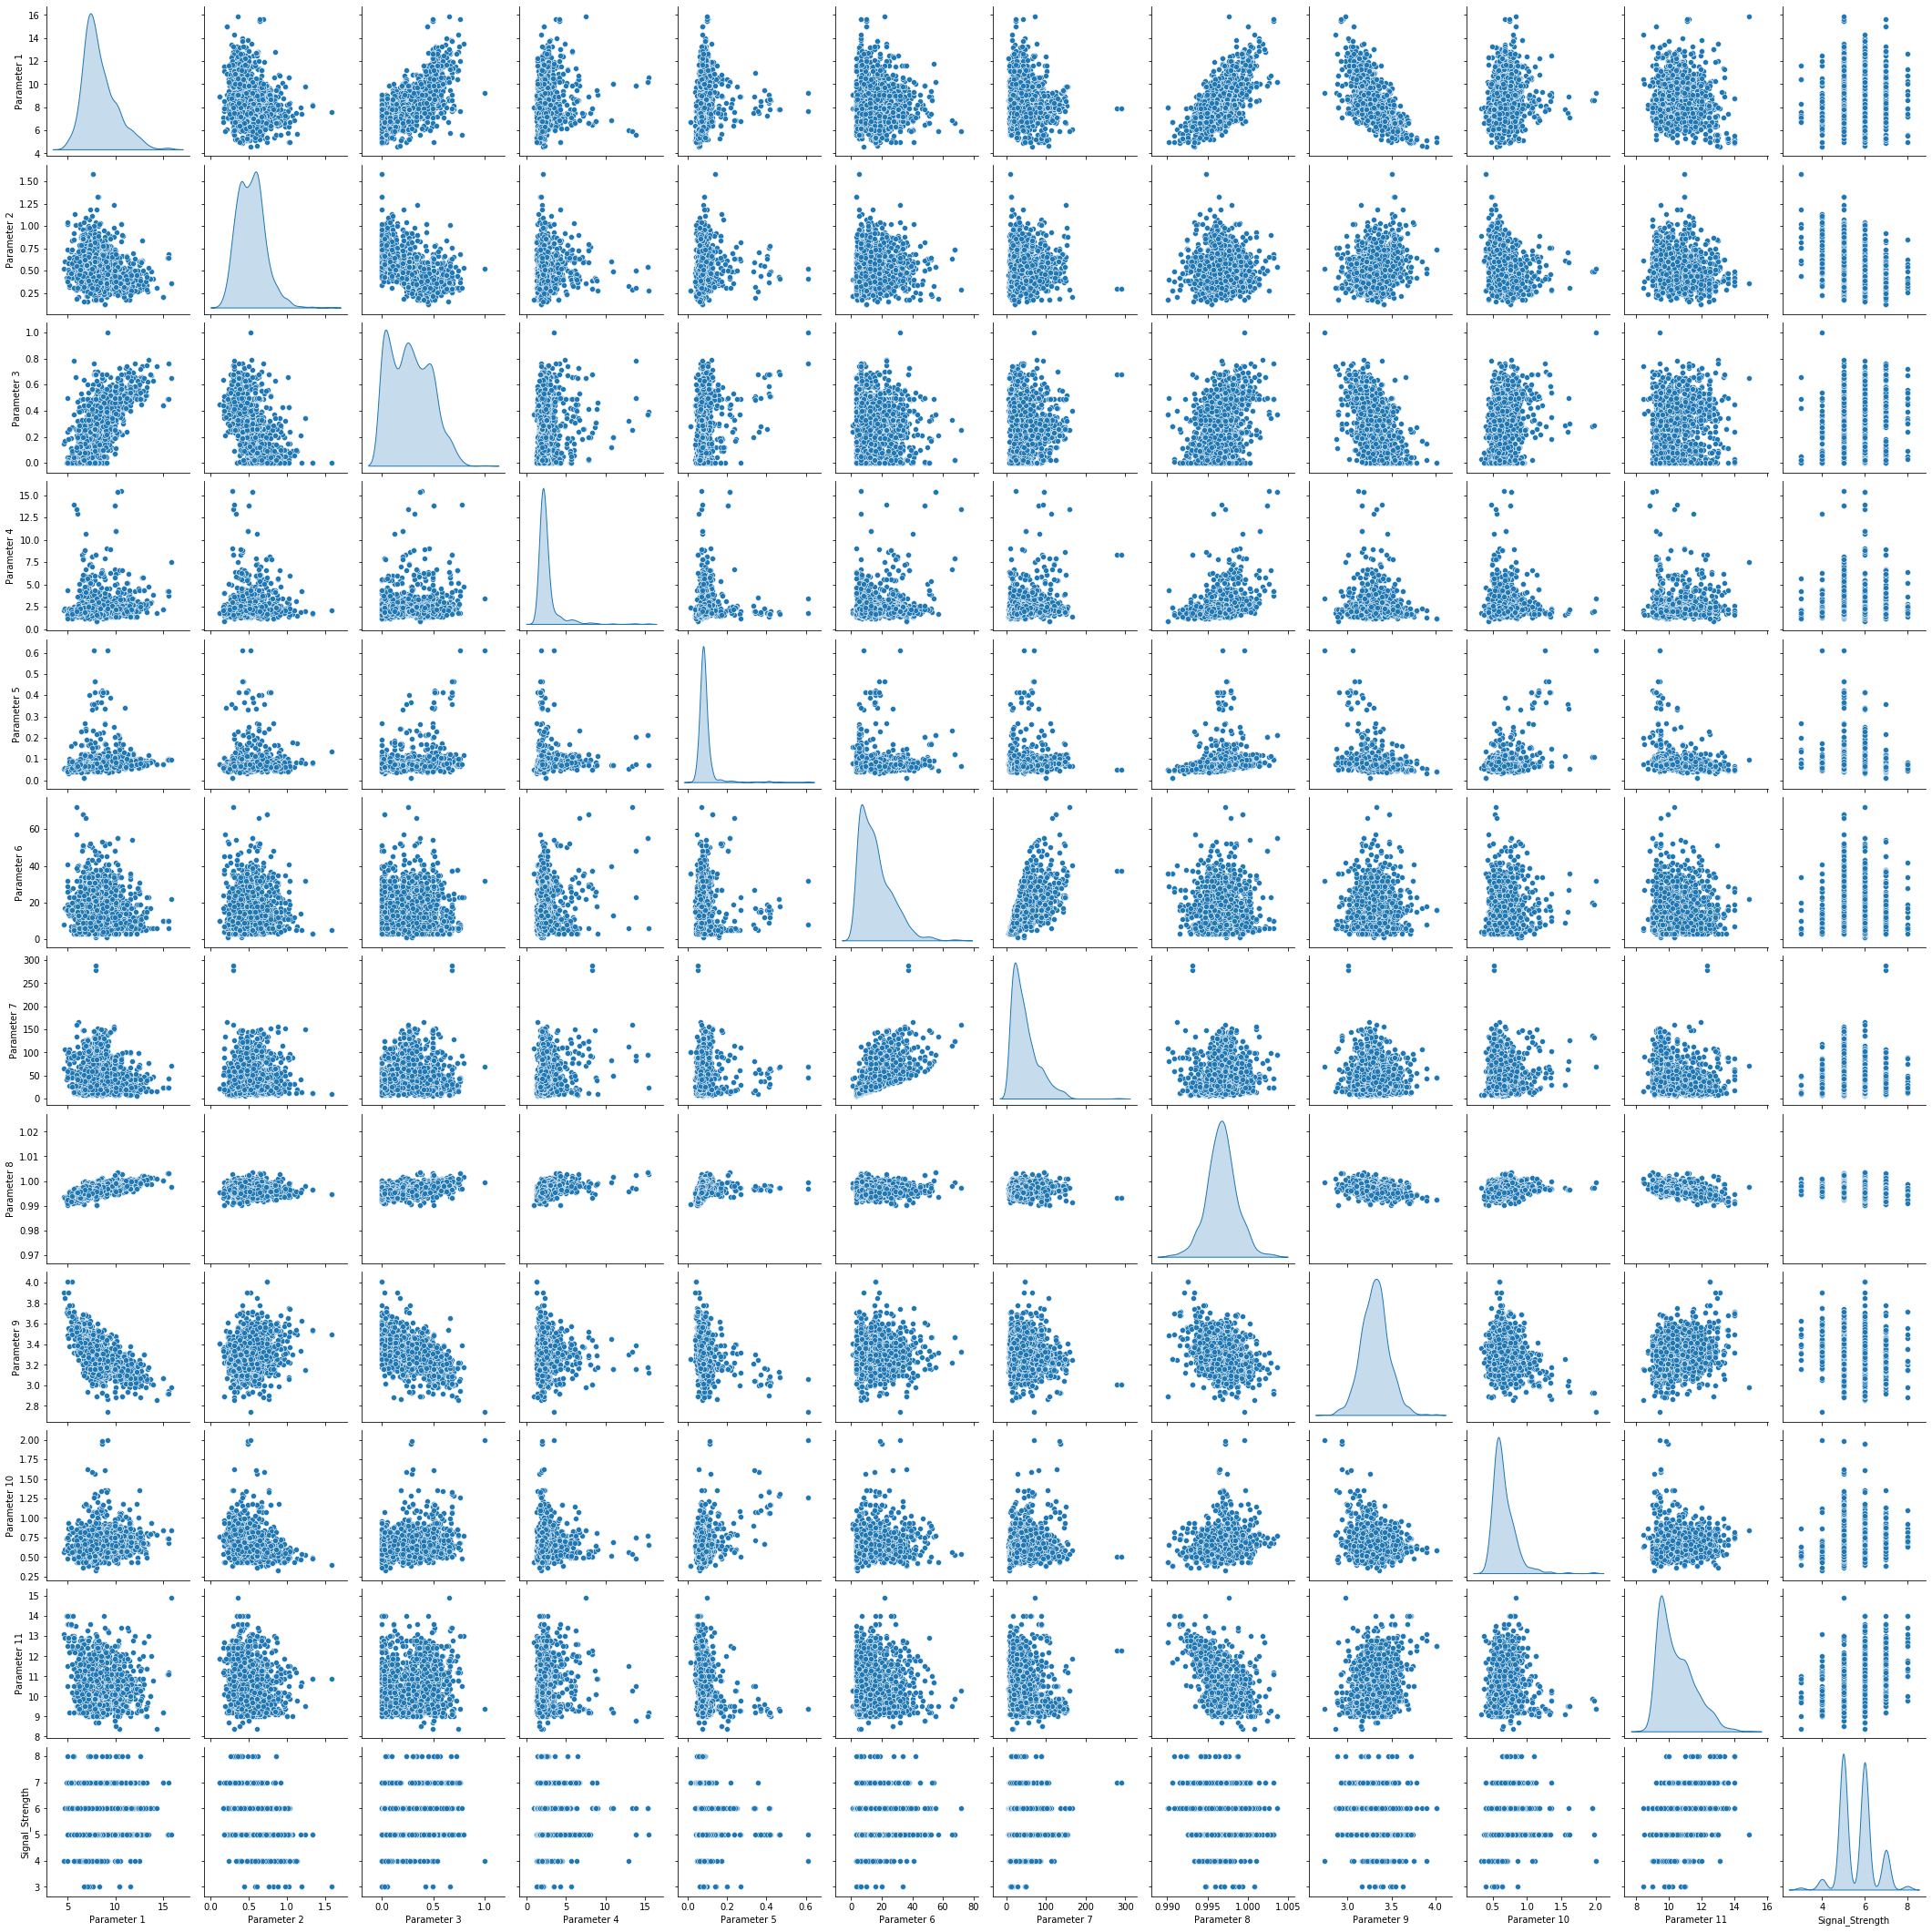

In [67]:
sns.pairplot(data_signal, diag_kind='kde')

##### Observations:
    - 'Parameter 6' and 'Parameter 7' have very high correlation coefficients. So, we drop 'Parameter 6'.
    - 'Parameter 8' does not seem to correlated with the signal strength data. So, we also drop this prameter.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 3. Design, train, tune and test a neural network regressor

In [30]:
data_signal = data_signal.drop(labels=['Parameter 6','Parameter 8'],axis=1)

In [31]:
data_signal.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 7,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,34.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,67.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,54.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,60.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,34.0,3.51,0.56,9.4,5


In [32]:
print(data_signal.size)
print(data_signal.shape)

15990
(1599, 10)


In [33]:
scaler = StandardScaler()
features = scaler.fit_transform(data_signal.drop(labels=['Signal_Strength'],axis=1))
signal_strength = data_signal['Signal_Strength']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, signal_strength, test_size=0.3746, random_state=1)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Basic model with 1 layer

In [35]:
model_NN_signal= tf.keras.models.Sequential()
model_NN_signal.add(tf.keras.layers.BatchNormalization(input_shape=(9,)))
model_NN_signal.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [36]:
model_NN_signal.compile(optimizer='sgd', loss='mse')
model_NN_signal.fit(X_train, y_train, batch_size=100, epochs=100, validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 0s 14ms/step - loss: 26.7886 - val_loss: 26.8802
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 25.9341 - val_loss: 26.0543
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 25.1365 - val_loss: 25.3198
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 24.4728 - val_loss: 24.7065
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 23.9570 - val_loss: 24.2235
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 23.5478 - val_loss: 23.8559
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 23.2493 - val_loss: 23.5804
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 22.9976 - val_loss: 23.3752
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 22.8495 - val_loss: 23.2191
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 22.7274 - val_loss: 23.0987
Epoch 11

In [37]:
model_NN_signal.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 9)                36        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1)                 10        
                                                                 
Total params: 46
Trainable params: 28
Non-trainable params: 18
_________________________________________________________________


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Better model with 9 layers with batch normalization

In [38]:
model_NN_signal= tf.keras.models.Sequential()
model_NN_signal.add(tf.keras.layers.BatchNormalization(input_shape=(9,)))
model_NN_signal.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_signal.add(tf.keras.layers.BatchNormalization())
model_NN_signal.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_signal.add(tf.keras.layers.BatchNormalization())
model_NN_signal.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_signal.add(tf.keras.layers.BatchNormalization())
model_NN_signal.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_signal.add(tf.keras.layers.BatchNormalization())
model_NN_signal.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_signal.add(tf.keras.layers.BatchNormalization())
model_NN_signal.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_signal.add(tf.keras.layers.BatchNormalization())
model_NN_signal.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_signal.add(tf.keras.layers.BatchNormalization())
model_NN_signal.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_signal.add(tf.keras.layers.BatchNormalization())
model_NN_signal.add(tf.keras.layers.Dense(1, activation="relu"))

In [39]:
model_NN_signal.compile(optimizer='sgd', loss='mse')
model_NN_signal.fit(features, signal_strength, batch_size=100, epochs=100, validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 2s 27ms/step - loss: 17.2257 - val_loss: 17.8520
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 7.2262 - val_loss: 9.2392
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 4.9310 - val_loss: 4.7524
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 3.6672 - val_loss: 2.0677
Epoch 5/100
13/13 [==============================] - 0s 9ms/step - loss: 2.8656 - val_loss: 1.0746
Epoch 6/100
13/13 [==============================] - 0s 9ms/step - loss: 3.5949 - val_loss: 1.0653
Epoch 7/100
13/13 [==============================] - 0s 9ms/step - loss: 2.6159 - val_loss: 0.7224
Epoch 8/100
13/13 [==============================] - 0s 8ms/step - loss: 2.1521 - val_loss: 0.5730
Epoch 9/100
13/13 [==============================] - 0s 9ms/step - loss: 1.7240 - val_loss: 0.6613
Epoch 10/100
13/13 [==============================] - 0s 9ms/step - loss: 1.4115 - val_loss: 0.6877
Epoch 

In [40]:
model_NN_signal.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Batc  (None, 9)                36        
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 128)               1280      
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                      

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Better model with 9 layers with batch normalization and weight initialization

In [41]:
model_NN_signal= tf.keras.models.Sequential()
model_NN_signal.add(tf.keras.layers.BatchNormalization(input_shape=(9,)))
model_NN_signal.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_signal.add(tf.keras.layers.BatchNormalization())
model_NN_signal.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_signal.add(tf.keras.layers.BatchNormalization())
model_NN_signal.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_signal.add(tf.keras.layers.BatchNormalization())
model_NN_signal.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_signal.add(tf.keras.layers.BatchNormalization())
model_NN_signal.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_signal.add(tf.keras.layers.BatchNormalization())
model_NN_signal.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_signal.add(tf.keras.layers.BatchNormalization())
model_NN_signal.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_signal.add(tf.keras.layers.BatchNormalization())
model_NN_signal.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_signal.add(tf.keras.layers.BatchNormalization())
model_NN_signal.add(tf.keras.layers.Dense(1, activation="relu",kernel_initializer='he_normal'))

In [42]:
model_NN_signal.compile(optimizer='sgd', loss='mse')
model_NN_signal.fit(features, signal_strength, batch_size=100, epochs=100, validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 2s 25ms/step - loss: 17.4509 - val_loss: 30.0253
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 8.5845 - val_loss: 23.5329
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 6.3955 - val_loss: 16.0435
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 4.6258 - val_loss: 12.0856
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 3.9141 - val_loss: 7.2427
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 3.0954 - val_loss: 4.7685
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 2.4582 - val_loss: 3.2769
Epoch 8/100
13/13 [==============================] - 0s 8ms/step - loss: 1.5427 - val_loss: 2.8112
Epoch 9/100
13/13 [==============================] - 0s 8ms/step - loss: 1.5759 - val_loss: 2.5945
Epoch 10/100
13/13 [==============================] - 0s 8ms/step - loss: 1.3632 - val_loss: 2.1734
Epo

In [43]:
model_NN_signal.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_10 (Bat  (None, 9)                36        
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 128)               1280      
                                                                 
 batch_normalization_11 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_12 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                      

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Model performance

In [44]:
model_NN_signal.evaluate(X_test, y_test)
predictions = model_NN_signal.predict(X_test)
predictions

19/19 [==============================] - 0s 2ms/step - loss: 0.2582


array([[4.953457 ],
       [5.065219 ],
       [6.1212454],
       [5.8140864],
       [5.8909416],
       [5.603467 ],
       [5.8617268],
       [4.879405 ],
       [4.985459 ],
       [4.809457 ],
       [6.29406  ],
       [5.693622 ],
       [5.7843738],
       [6.8162694],
       [5.938493 ],
       [4.878318 ],
       [6.0600276],
       [5.74499  ],
       [5.4581666],
       [5.243462 ],
       [6.436541 ],
       [6.083709 ],
       [4.942359 ],
       [6.070172 ],
       [5.140255 ],
       [6.692914 ],
       [6.156796 ],
       [5.5217366],
       [5.5336614],
       [7.2326026],
       [6.002418 ],
       [5.9396777],
       [5.020656 ],
       [7.200705 ],
       [4.8037643],
       [6.053621 ],
       [4.938786 ],
       [6.839476 ],
       [6.6945324],
       [4.9577193],
       [6.045995 ],
       [4.910326 ],
       [4.821204 ],
       [5.983088 ],
       [5.1670747],
       [5.3414073],
       [4.8546286],
       [5.2805114],
       [4.946083 ],
       [5.895371 ],


In [45]:
df_comp = pd.DataFrame({'Predictions':predictions.reshape(predictions.shape[0],).round(),'Actual data':np.array(y_test)})
print('Comparing the predictions and the actual values of the test data:')
df_comp

Comparing the predictions and the actual values of the test data:


,Predictions,Actual data
0,5.0,5
1,5.0,6
2,6.0,6
3,6.0,6
4,6.0,6
...,...,...
594,7.0,7
595,6.0,6
596,5.0,5
597,7.0,7


In [46]:
comp_vec = df_comp['Predictions']==df_comp['Actual data']
comp_vec.value_counts()

True     507
False     92
dtype: int64

#### Observations:
    - we observe that the model with batch normalization and weight initialization perform very well on the training and the testing data.
    - we predicted 524 instances out of 599 instances correctly using the model with batch normalization and weight initialization.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 4. Pickle the model for future use

In [53]:
model_NN_signal.save('saved_model_NN_signal.h5')
model_NN_signal.save_weights('saved_model_weights_NN_signal.h5')

In [54]:
model_NN_signal = tf.keras.models.load_model('saved_model_NN_signal.h5')

<span style="font-family: Arial; font-weight:bold;font-size:3em;color:#00b3e5;"> Part 2

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  1. Import data:

In [180]:
f = h5py.File('Part_2_Autonomous_Vehicles_SVHN_single_grey.h5', 'r')

In [181]:
list(f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [182]:
X_test = f['X_test'][...]
X_train = f['X_train'][...]
X_val = f['X_val'][...]
y_test = f['y_test'][...]
y_train = f['y_train'][...]
y_val = f['y_val'][...]

In [183]:
print(X_test.size)
print(X_test.shape)

18432000
(18000, 32, 32)


In [184]:
print(X_train.size)
print(X_train.shape)

43008000
(42000, 32, 32)


In [185]:
print(X_val.size)
print(X_val.shape)

61440000
(60000, 32, 32)


In [186]:
print(y_test.size)
print(y_test.shape)

18000
(18000,)


In [187]:
print(y_train.size)
print(y_train.shape)

42000
(42000,)


In [188]:
print(y_val.size)
print(y_val.shape)

60000
(60000,)


In [189]:
print(X_test.dtype)
print(X_train.dtype)
print(X_val.dtype)
print(y_test.dtype)
print(y_train.dtype)
print(y_val.dtype)

float32
float32
float32
uint8
uint8
uint8


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 2. Data pre-processing and visualisation

In [190]:
X_test[0]

array([[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904, 112.1646],
       [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475, 109.9368],
       [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414, 109.1048],
       ...,
       [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074, 112.7346],
       [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 , 114.3431],
       [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017, 114.1906]],
      dtype=float32)

In [191]:
X_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [192]:
X_val[0]

array([[ 44.299 ,  45.9999,  51.3306, ...,  25.2764,  27.515 ,  27.156 ],
       [ 49.1351,  60.3081,  70.1222, ...,  23.7002,  25.2378,  24.2918],
       [ 60.7595,  83.7141, 102.1961, ...,  24.5044,  24.9712,  22.8512],
       ...,
       [ 67.1072,  93.2464, 109.2017, ...,  26.6444,  24.6015,  22.9607],
       [ 24.7569,  36.6417,  48.9071, ...,  21.9268,  21.5309,  21.5479],
       [ 22.6584,  22.7724,  27.2666, ...,  21.443 ,  20.8191,  20.0812]],
      dtype=float32)

In [193]:
y_test[0:10000]

array([1, 7, 2, ..., 0, 7, 6], dtype=uint8)

In [194]:
y_train[0:10000]

array([2, 6, 7, ..., 4, 2, 8], dtype=uint8)

In [195]:
y_val[0:10000]

array([0, 0, 0, ..., 2, 2, 2], dtype=uint8)

In [196]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [197]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [198]:
np.unique(y_val)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

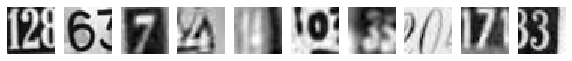

Corresponding labels: [2 6 7 4 4 0 3 0 7 3]


In [199]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('Corresponding labels: %s' % (y_train[0:10]))

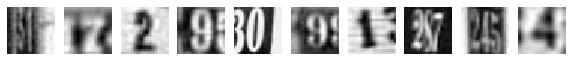

Corresponding labels: [1 7 2 9 0 9 1 8 4 4]


In [200]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i], cmap="gray")
    plt.axis('off')
plt.show()
print('Corresponding labels: %s' % (y_test[0:10]))

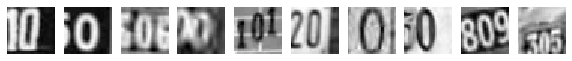

Corresponding labels: [0 0 0 0 0 0 0 0 0 0]


In [201]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_val[i], cmap="gray")
    plt.axis('off')
plt.show()
print('Corresponding labels: %s' % (y_val[0:10]))

In [202]:
# Reshaping input data for training, testing and validation datasets
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 1)

In [203]:
print(X_train.shape)
print(X_train[0])

(42000, 32, 32, 1)
[[[ 33.0704]
  [ 30.2601]
  [ 26.852 ]
  ...
  [ 71.4471]
  [ 58.2204]
  [ 42.9939]]

 [[ 25.2283]
  [ 25.5533]
  [ 29.9765]
  ...
  [113.0209]
  [103.3639]
  [ 84.2949]]

 [[ 26.2775]
  [ 22.6137]
  [ 40.4763]
  ...
  [113.3028]
  [121.775 ]
  [115.4228]]

 ...

 [[ 28.5502]
  [ 36.212 ]
  [ 45.0801]
  ...
  [ 24.1359]
  [ 25.0927]
  [ 26.0603]]

 [[ 38.4352]
  [ 26.4733]
  [ 23.2717]
  ...
  [ 28.1094]
  [ 29.4683]
  [ 30.0661]]

 [[ 50.2984]
  [ 26.0773]
  [ 24.0389]
  ...
  [ 49.6682]
  [ 50.853 ]
  [ 53.0377]]]


In [204]:
print(X_test.shape)
print(X_test[0])

(18000, 32, 32, 1)
[[[ 40.558 ]
  [ 46.7917]
  [ 48.9764]
  ...
  [112.1153]
  [112.9904]
  [112.1646]]

 [[ 39.4379]
  [ 44.2911]
  [ 47.1768]
  ...
  [111.0122]
  [110.9475]
  [109.9368]]

 [[ 38.4488]
  [ 43.6394]
  [ 48.7098]
  ...
  [109.8921]
  [109.9414]
  [109.1048]]

 ...

 [[ 34.9869]
  [ 35.4707]
  [ 39.6676]
  ...
  [109.211 ]
  [109.9074]
  [112.7346]]

 [[ 35.6602]
  [ 35.5462]
  [ 40.3193]
  ...
  [110.9998]
  [112.049 ]
  [114.3431]]

 [[ 36.1871]
  [ 35.4214]
  [ 40.6998]
  ...
  [110.0169]
  [111.2017]
  [114.1906]]]


In [205]:
print(X_val.shape)
print(X_val[0])

(60000, 32, 32, 1)
[[[ 44.299 ]
  [ 45.9999]
  [ 51.3306]
  ...
  [ 25.2764]
  [ 27.515 ]
  [ 27.156 ]]

 [[ 49.1351]
  [ 60.3081]
  [ 70.1222]
  ...
  [ 23.7002]
  [ 25.2378]
  [ 24.2918]]

 [[ 60.7595]
  [ 83.7141]
  [102.1961]
  ...
  [ 24.5044]
  [ 24.9712]
  [ 22.8512]]

 ...

 [[ 67.1072]
  [ 93.2464]
  [109.2017]
  ...
  [ 26.6444]
  [ 24.6015]
  [ 22.9607]]

 [[ 24.7569]
  [ 36.6417]
  [ 48.9071]
  ...
  [ 21.9268]
  [ 21.5309]
  [ 21.5479]]

 [[ 22.6584]
  [ 22.7724]
  [ 27.2666]
  ...
  [ 21.443 ]
  [ 20.8191]
  [ 20.0812]]]


In [206]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [207]:
print(y_train.shape)
print(y_train[0])

(42000, 10)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [208]:
print(y_test.shape)
print(y_test[0])

(18000, 10)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [209]:
print(y_val.shape)
print(y_val[0])

(60000, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 3. Design, train, tune and test a neural network image classifier

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Basic single layer

In [210]:
model_NN_imageClassifier_single_layer = tf.keras.models.Sequential()
model_NN_imageClassifier_single_layer.add(tf.keras.layers.Flatten())
model_NN_imageClassifier_single_layer.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_imageClassifier_single_layer.add(tf.keras.layers.Dense(10, activation="softmax"))

In [211]:
model_NN_imageClassifier_single_layer.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")
history_single_layer = model_NN_imageClassifier_single_layer.fit(x=X_train, y=y_train, batch_size=210, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 1938.2848 - accuracy: 0.0991 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 2.3029 - accuracy: 0.1020 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1020 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 2.3025 - accuracy: 0.1020 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 2.3025 - accuracy: 0.1020 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 2.3025 - accuracy: 0.1020 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 2.3025 - accuracy: 0.1020 - val_loss: 2.3026 - val_accuracy: 0.1000
Epo

In [212]:
model_NN_imageClassifier_single_layer.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_82 (Dense)            (None, 128)               131200    
                                                                 
 dense_83 (Dense)            (None, 10)                1290      
                                                                 
Total params: 132,490
Trainable params: 132,490
Non-trainable params: 0
_________________________________________________________________


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> BatchNormalization

In [213]:
model_NN_imageClassifier_batchNormalization = tf.keras.models.Sequential()
model_NN_imageClassifier_batchNormalization.add(tf.keras.layers.Flatten())
model_NN_imageClassifier_batchNormalization.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_imageClassifier_batchNormalization.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_imageClassifier_batchNormalization.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_imageClassifier_batchNormalization.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_imageClassifier_batchNormalization.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_imageClassifier_batchNormalization.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_imageClassifier_batchNormalization.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_imageClassifier_batchNormalization.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_imageClassifier_batchNormalization.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization.add(tf.keras.layers.Dense(10, activation="softmax"))

In [214]:
model_NN_imageClassifier_batchNormalization.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")
history_batchNormalization = model_NN_imageClassifier_batchNormalization.fit(x=X_train, y=y_train, batch_size=210, epochs=150, validation_data=(X_val, y_val))

Epoch 1/150
200/200 [==============================] - 3s 9ms/step - loss: 2.3445 - accuracy: 0.2135 - val_loss: 2.2112 - val_accuracy: 0.2228
Epoch 2/150
200/200 [==============================] - 1s 7ms/step - loss: 1.5486 - accuracy: 0.4816 - val_loss: 1.5322 - val_accuracy: 0.4884
Epoch 3/150
200/200 [==============================] - 1s 7ms/step - loss: 1.2478 - accuracy: 0.5935 - val_loss: 1.3875 - val_accuracy: 0.5449
Epoch 4/150
200/200 [==============================] - 1s 7ms/step - loss: 1.1190 - accuracy: 0.6366 - val_loss: 1.2022 - val_accuracy: 0.6176
Epoch 5/150
200/200 [==============================] - 1s 7ms/step - loss: 1.0428 - accuracy: 0.6653 - val_loss: 1.1036 - val_accuracy: 0.6549
Epoch 6/150
200/200 [==============================] - 1s 7ms/step - loss: 0.9674 - accuracy: 0.6913 - val_loss: 1.1407 - val_accuracy: 0.6444
Epoch 7/150
200/200 [==============================] - 2s 8ms/step - loss: 0.9097 - accuracy: 0.7112 - val_loss: 1.2300 - val_accuracy: 0.6160

In [215]:
model_NN_imageClassifier_batchNormalization.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_84 (Dense)            (None, 128)               131200    
                                                                 
 batch_normalization_74 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_85 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_75 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_86 (Dense)            (None, 128)             

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Batch normalization and weight initialization

In [228]:
model_NN_imageClassifier_batchNormalization_wt_ini = tf.keras.models.Sequential()
model_NN_imageClassifier_batchNormalization_wt_ini.add(tf.keras.layers.Flatten())
model_NN_imageClassifier_batchNormalization_wt_ini.add(tf.keras.layers.Dense(128, activation="relu", kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini.add(tf.keras.layers.Dense(128, activation="relu", kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini.add(tf.keras.layers.Dense(128, activation="relu", kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini.add(tf.keras.layers.Dense(128, activation="relu", kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini.add(tf.keras.layers.Dense(128, activation="relu", kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini.add(tf.keras.layers.Dense(128, activation="relu", kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini.add(tf.keras.layers.Dense(128, activation="relu", kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini.add(tf.keras.layers.Dense(128, activation="relu", kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini.add(tf.keras.layers.Dense(10, activation="softmax"))

In [229]:
model_NN_imageClassifier_batchNormalization_wt_ini.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")
history_batchNormalization_wt_ini = model_NN_imageClassifier_batchNormalization_wt_ini.fit(x=X_train, y=y_train, batch_size=210, epochs=150, validation_data=(X_val, y_val))

Epoch 1/150
200/200 [==============================] - 3s 9ms/step - loss: 2.4656 - accuracy: 0.1790 - val_loss: 2.8414 - val_accuracy: 0.1296
Epoch 2/150
200/200 [==============================] - 2s 8ms/step - loss: 1.7737 - accuracy: 0.3900 - val_loss: 2.0907 - val_accuracy: 0.3120
Epoch 3/150
200/200 [==============================] - 2s 8ms/step - loss: 1.4412 - accuracy: 0.5205 - val_loss: 1.9047 - val_accuracy: 0.3688
Epoch 4/150
200/200 [==============================] - 2s 8ms/step - loss: 1.2708 - accuracy: 0.5810 - val_loss: 1.4120 - val_accuracy: 0.5319
Epoch 5/150
200/200 [==============================] - 1s 7ms/step - loss: 1.1608 - accuracy: 0.6226 - val_loss: 1.2790 - val_accuracy: 0.5862
Epoch 6/150
200/200 [==============================] - 1s 7ms/step - loss: 1.0908 - accuracy: 0.6469 - val_loss: 1.1583 - val_accuracy: 0.6323
Epoch 7/150
200/200 [==============================] - 1s 7ms/step - loss: 1.0356 - accuracy: 0.6667 - val_loss: 1.1189 - val_accuracy: 0.6475

In [230]:
model_NN_imageClassifier_batchNormalization_wt_ini.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_103 (Dense)           (None, 128)               131200    
                                                                 
 batch_normalization_91 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_104 (Dense)           (None, 128)               16512     
                                                                 
 batch_normalization_92 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_105 (Dense)           (None, 128)             

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Batch normalization and dropout

In [216]:
model_NN_imageClassifier_batchNormalization_dropout = tf.keras.models.Sequential()
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.Flatten())
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.Dropout(0.2))
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.Dropout(0.2))
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.Dropout(0.2))
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.Dropout(0.2))
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.Dropout(0.2))
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.Dropout(0.2))
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.Dropout(0.2))
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.Dropout(0.2))
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.Dense(128, activation="relu"))
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.Dropout(0.2))
model_NN_imageClassifier_batchNormalization_dropout.add(tf.keras.layers.Dense(10, activation="softmax"))

In [217]:
model_NN_imageClassifier_batchNormalization_dropout.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")
history_batchNormalization_dropout = model_NN_imageClassifier_batchNormalization_dropout.fit(x=X_train, y=y_train, batch_size=210, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
200/200 [==============================] - 3s 10ms/step - loss: 2.8716 - accuracy: 0.1010 - val_loss: 2.3396 - val_accuracy: 0.1026
Epoch 2/300
200/200 [==============================] - 2s 9ms/step - loss: 2.6257 - accuracy: 0.1029 - val_loss: 2.3219 - val_accuracy: 0.1075
Epoch 3/300
200/200 [==============================] - 2s 9ms/step - loss: 2.5359 - accuracy: 0.1031 - val_loss: 2.3181 - val_accuracy: 0.1196
Epoch 4/300
200/200 [==============================] - 2s 9ms/step - loss: 2.4720 - accuracy: 0.1068 - val_loss: 2.2952 - val_accuracy: 0.1301
Epoch 5/300
200/200 [==============================] - 2s 9ms/step - loss: 2.4253 - accuracy: 0.1109 - val_loss: 2.2749 - val_accuracy: 0.1387
Epoch 6/300
200/200 [==============================] - 2s 9ms/step - loss: 2.3804 - accuracy: 0.1183 - val_loss: 2.2278 - val_accuracy: 0.1553
Epoch 7/300
200/200 [==============================] - 2s 10ms/step - loss: 2.3298 - accuracy: 0.1302 - val_loss: 2.1650 - val_accuracy: 0.18

In [218]:
model_NN_imageClassifier_batchNormalization_dropout.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_93 (Dense)            (None, 128)               131200    
                                                                 
 batch_normalization_82 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_94 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_83 (Bat  (None, 128)              512       
 chNormalization)                                    

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Batch normalization, weight initialization and dropout

In [233]:
model_NN_imageClassifier_batchNormalization_wt_ini_dropout = tf.keras.models.Sequential()
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Flatten())
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dropout(0.2))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dropout(0.2))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dropout(0.2))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dropout(0.2))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dropout(0.2))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dropout(0.2))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dropout(0.2))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dropout(0.2))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal'))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.BatchNormalization())
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dropout(0.2))
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.add(tf.keras.layers.Dense(10, activation="softmax"))

In [235]:
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")
history_batchNormalization_wt_ini_dropout = model_NN_imageClassifier_batchNormalization_wt_ini_dropout.fit(x=X_train, y=y_train, batch_size=210, epochs=150, validation_data=(X_val, y_val))

Epoch 1/150
200/200 [==============================] - 3s 10ms/step - loss: 2.9392 - accuracy: 0.0984 - val_loss: 2.4021 - val_accuracy: 0.1000
Epoch 2/150
200/200 [==============================] - 2s 9ms/step - loss: 2.6812 - accuracy: 0.0998 - val_loss: 2.3593 - val_accuracy: 0.1002
Epoch 3/150
200/200 [==============================] - 2s 8ms/step - loss: 2.5516 - accuracy: 0.1041 - val_loss: 2.3319 - val_accuracy: 0.1049
Epoch 4/150
200/200 [==============================] - 2s 8ms/step - loss: 2.4961 - accuracy: 0.1026 - val_loss: 2.3376 - val_accuracy: 0.1012
Epoch 5/150
200/200 [==============================] - 2s 8ms/step - loss: 2.4479 - accuracy: 0.1025 - val_loss: 2.3181 - val_accuracy: 0.1051
Epoch 6/150
200/200 [==============================] - 2s 8ms/step - loss: 2.4144 - accuracy: 0.1026 - val_loss: 2.3063 - val_accuracy: 0.1167
Epoch 7/150
200/200 [==============================] - 2s 8ms/step - loss: 2.3888 - accuracy: 0.1025 - val_loss: 2.3025 - val_accuracy: 0.117

In [236]:
model_NN_imageClassifier_batchNormalization_wt_ini_dropout.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 1024)              0         
                                                                 
 dense_112 (Dense)           (None, 128)               131200    
                                                                 
 batch_normalization_99 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_113 (Dense)           (None, 128)               16512     
                                                                 
 batch_normalization_100 (Ba  (None, 128)              512       
 tchNormalization)                                   

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 4. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs

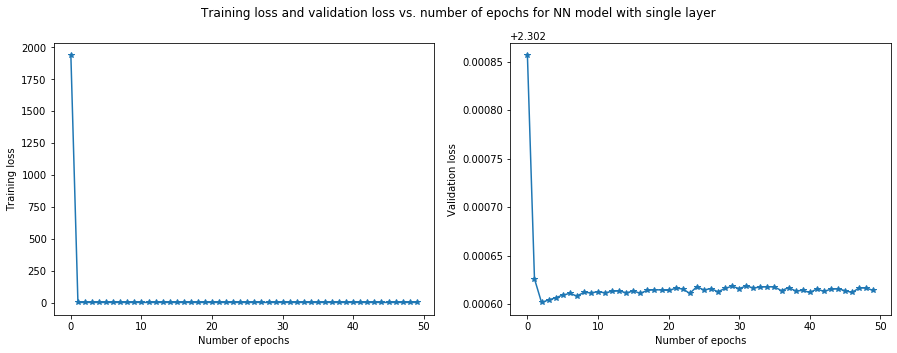

In [219]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Training loss and validation loss vs. number of epochs for NN model with single layer')

ax[0].plot(range(len(history_single_layer.history['loss'])), history_single_layer.history['loss'],'-*')
ax[0].set(xlabel='Number of epochs', ylabel='Training loss')

ax[1].plot(range(len(history_single_layer.history['val_loss'])), history_single_layer.history['val_loss'],'-*')
ax[1].set(xlabel='Number of epochs', ylabel='Validation loss')

plt.show()

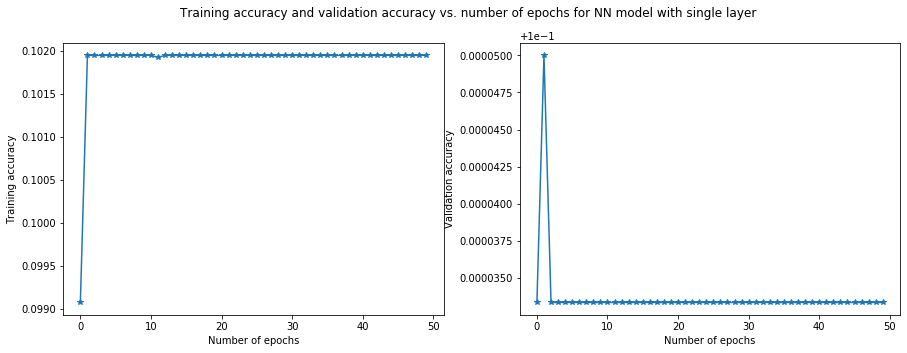

In [220]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Training accuracy and validation accuracy vs. number of epochs for NN model with single layer')

ax[0].plot(range(len(history_single_layer.history['accuracy'])), history_single_layer.history['accuracy'],'-*')
ax[0].set(xlabel='Number of epochs', ylabel='Training accuracy')

ax[1].plot(range(len(history_single_layer.history['val_accuracy'])), history_single_layer.history['val_accuracy'],'-*')
ax[1].set(xlabel='Number of epochs', ylabel='Validation accuracy')

plt.show()

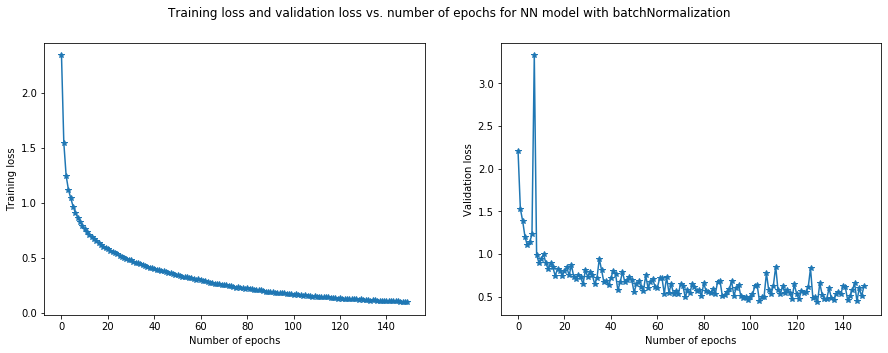

In [221]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Training loss and validation loss vs. number of epochs for NN model with batchNormalization')

ax[0].plot(range(len(history_batchNormalization.history['loss'])), history_batchNormalization.history['loss'],'-*')
ax[0].set(xlabel='Number of epochs', ylabel='Training loss')

ax[1].plot(range(len(history_batchNormalization.history['val_loss'])), history_batchNormalization.history['val_loss'],'-*')
ax[1].set(xlabel='Number of epochs', ylabel='Validation loss')

plt.show()

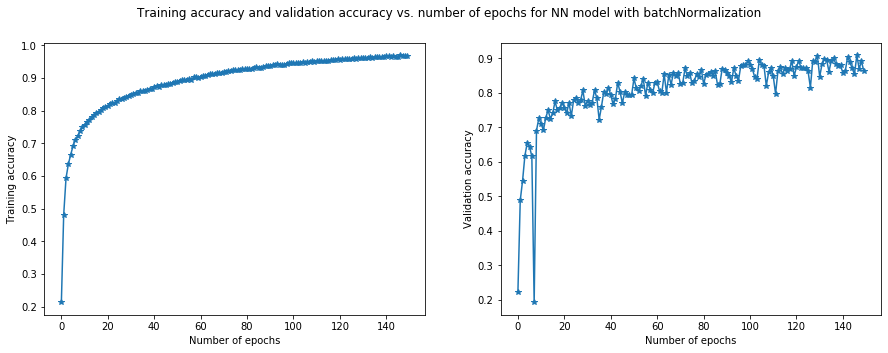

In [222]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Training accuracy and validation accuracy vs. number of epochs for NN model with batchNormalization')

ax[0].plot(range(len(history_batchNormalization.history['accuracy'])), history_batchNormalization.history['accuracy'],'-*')
ax[0].set(xlabel='Number of epochs', ylabel='Training accuracy')

ax[1].plot(range(len(history_batchNormalization.history['val_accuracy'])), history_batchNormalization.history['val_accuracy'],'-*')
ax[1].set(xlabel='Number of epochs', ylabel='Validation accuracy')

plt.show()

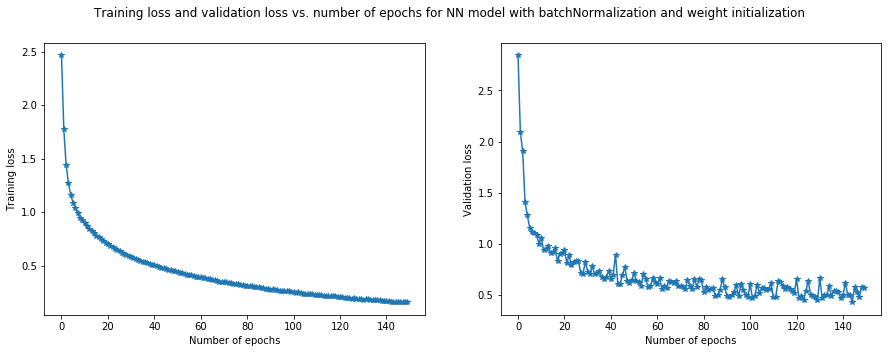

In [231]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Training loss and validation loss vs. number of epochs for NN model with batchNormalization and weight initialization')

ax[0].plot(range(len(history_batchNormalization_wt_ini.history['loss'])), history_batchNormalization_wt_ini.history['loss'],'-*')
ax[0].set(xlabel='Number of epochs', ylabel='Training loss')

ax[1].plot(range(len(history_batchNormalization_wt_ini.history['val_loss'])), history_batchNormalization_wt_ini.history['val_loss'],'-*')
ax[1].set(xlabel='Number of epochs', ylabel='Validation loss')

plt.show()

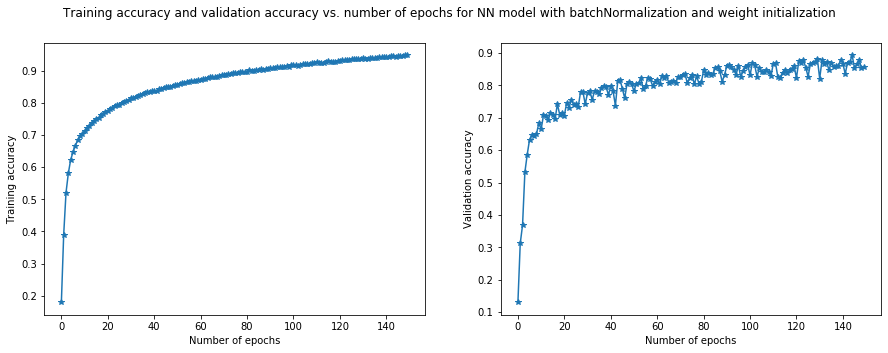

In [232]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Training accuracy and validation accuracy vs. number of epochs for NN model with batchNormalization and weight initialization')

ax[0].plot(range(len(history_batchNormalization_wt_ini.history['accuracy'])), history_batchNormalization_wt_ini.history['accuracy'],'-*')
ax[0].set(xlabel='Number of epochs', ylabel='Training accuracy')

ax[1].plot(range(len(history_batchNormalization_wt_ini.history['val_accuracy'])), history_batchNormalization_wt_ini.history['val_accuracy'],'-*')
ax[1].set(xlabel='Number of epochs', ylabel='Validation accuracy')

plt.show()

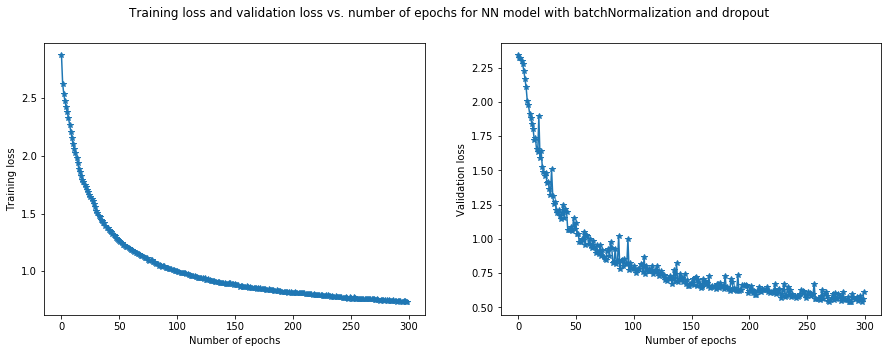

In [223]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Training loss and validation loss vs. number of epochs for NN model with batchNormalization and dropout')

ax[0].plot(range(len(history_batchNormalization_dropout.history['loss'])), history_batchNormalization_dropout.history['loss'],'-*')
ax[0].set(xlabel='Number of epochs', ylabel='Training loss')

ax[1].plot(range(len(history_batchNormalization_dropout.history['val_loss'])), history_batchNormalization_dropout.history['val_loss'],'-*')
ax[1].set(xlabel='Number of epochs', ylabel='Validation loss')

plt.show()

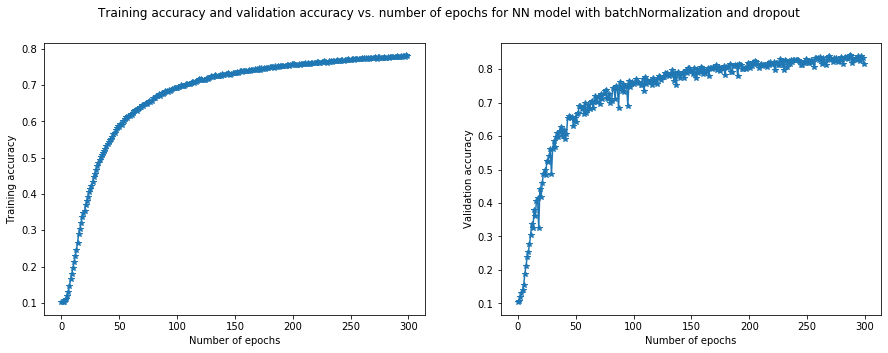

In [224]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Training accuracy and validation accuracy vs. number of epochs for NN model with batchNormalization and dropout')

ax[0].plot(range(len(history_batchNormalization_dropout.history['accuracy'])), history_batchNormalization_dropout.history['accuracy'],'-*')
ax[0].set(xlabel='Number of epochs', ylabel='Training accuracy')

ax[1].plot(range(len(history_batchNormalization_dropout.history['val_accuracy'])), history_batchNormalization_dropout.history['val_accuracy'],'-*')
ax[1].set(xlabel='Number of epochs', ylabel='Validation accuracy')

plt.show()

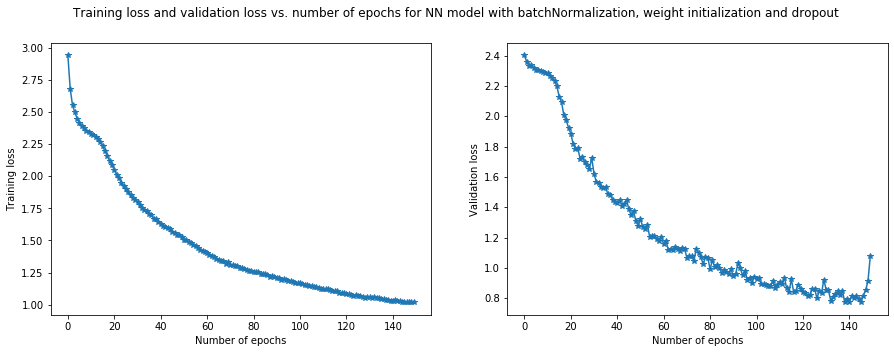

In [240]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Training loss and validation loss vs. number of epochs for NN model with batchNormalization, weight initialization and dropout')

ax[0].plot(range(len(history_batchNormalization_wt_ini_dropout.history['loss'])), history_batchNormalization_wt_ini_dropout.history['loss'],'-*')
ax[0].set(xlabel='Number of epochs', ylabel='Training loss')

ax[1].plot(range(len(history_batchNormalization_wt_ini_dropout.history['val_loss'])), history_batchNormalization_wt_ini_dropout.history['val_loss'],'-*')
ax[1].set(xlabel='Number of epochs', ylabel='Validation loss')

plt.show()

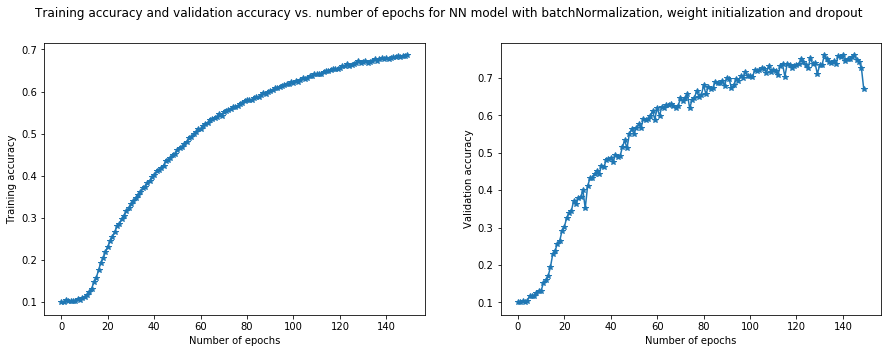

In [241]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Training accuracy and validation accuracy vs. number of epochs for NN model with batchNormalization, weight initialization and dropout')

ax[0].plot(range(len(history_batchNormalization_wt_ini_dropout.history['accuracy'])), history_batchNormalization_wt_ini_dropout.history['accuracy'],'-*')
ax[0].set(xlabel='Number of epochs', ylabel='Training accuracy')

ax[1].plot(range(len(history_batchNormalization_wt_ini_dropout.history['val_accuracy'])), history_batchNormalization_wt_ini_dropout.history['val_accuracy'],'-*')
ax[1].set(xlabel='Number of epochs', ylabel='Validation accuracy')

plt.show()

In [225]:
predictions = model_NN_imageClassifier_batchNormalization.evaluate(X_test, y_test)

563/563 [==============================] - 1s 1ms/step - loss: 1.3472 - accuracy: 0.7598


##### Observations:
    - the training and validation accuracy for the simple model is not improving with respect to the number of epochs.
    - however, the metrics improved by adding layers and batch normalization.
    - there are some irregularities in the distributions of the training and validation losses and accuracy with respect to the number of epochs for the case of batch normalization.
    - these irregularities are removed when weights are initialized using kernel or using dropout methodology.
    - finally, the training and validation accuracy for the model with batch normalization without weight initiation and droput turn out to be better than the other three cases studied here.